In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
customer = pd.read_csv('/Users/rajeshkannan/Desktop/GUVI/Project/Customer Conversion Prediction.csv')

In [4]:
customer

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [5]:
customer.keys()

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [6]:
type(customer)

pandas.core.frame.DataFrame

In [7]:
print(customer.mon)

0        may
1        may
2        may
3        may
4        may
        ... 
45206    nov
45207    nov
45208    nov
45209    nov
45210    nov
Name: mon, Length: 45211, dtype: object


In [8]:
customer.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [9]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [10]:
customer.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [11]:
#checking the missing values
customer.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

## EDA

In [12]:
customer.corr()

,age,day,dur,num_calls
age,1.000000,-0.009120,-0.004648,0.00476
day,-0.009120,1.000000,-0.030206,0.16249
dur,-0.004648,-0.030206,1.000000,-0.08457
num_calls,0.004760,0.162490,-0.084570,1.00000


In [13]:
customer.shape

(45211, 11)

In [14]:
customer.size

497321

In [15]:
customer.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
45206    False
45207    False
45208    False
45209    False
45210    False
Length: 45211, dtype: bool

In [16]:
customer.duplicated().sum()

6

In [17]:
customer.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [18]:
customer.num_calls.value_counts()

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: num_calls, dtype: int64

In [41]:
# Print unique values in 'job' column before encoding
print(customer['job'].unique())

# Apply label encoding
customer['job'] = customer['job'].map({
    'blue-collar': 1,
    'entrepreneur': 2,
    'services': 3,
    'housemaid': 4,
    'technician': 5,
    'self-employed': 6,
    'admin.': 7,
    'management': 8,
    'unemployed': 9,
    'retired': 10,
    'student': 11,
    'unknown': 12
})

# Print unique values in 'job' column after encoding
print(customer['job'].unique())


['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
[ 8  5  2  1 12 10  7  3  6  9  4 11]


In [42]:
customer['education_qual']

0         tertiary
1        secondary
2        secondary
3          unknown
4          unknown
           ...    
45206     tertiary
45207      primary
45208    secondary
45209    secondary
45210    secondary
Name: education_qual, Length: 45211, dtype: object

In [43]:
#encoding for educational qualification (Label Encoding)
customer['education_qual'] = customer['education_qual'].map({'primary': 1, 'secondary': 2, 'tertiary' :3, 'unknown' :4})

print(customer['education_qual'].unique())


[3 2 4 1]


In [44]:
# Encoding for month column (Label Encoding)
customer['mon']=customer['mon'].map({'may': 1, 'jul' : 2, 'jan': 3, 'nov': 4, 'jun' : 5, 'aug' : 6, 'feb' : 7, 'apr' : 8, 'oct' : 9, 'dec' : 10 , 'sep': 11, 'mar': 12})
customer.head(3)


,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,8,married,3,unknown,5,1,261,1,unknown,no,0
1,44,5,single,2,unknown,5,1,151,1,unknown,no,0
2,33,2,married,2,unknown,5,1,76,1,unknown,no,0


In [45]:

#Encoding for Marital status (Label Encoding)
customer['marital'] =customer['marital'].map({'married': 1, 'divorced': 2, 'single' : 3})
customer.head(3)


,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,8,1,3,unknown,5,1,261,1,unknown,no,0
1,44,5,3,2,unknown,5,1,151,1,unknown,no,0
2,33,2,1,2,unknown,5,1,76,1,unknown,no,0


In [46]:
# Encoding for call type column (Label Encoding)
customer['call_type'] = customer['call_type'].map({'unknown': 1, 'telephone' : 2, 'cellular' : 3})
customer.head(3)


,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,8,1,3,1,5,1,261,1,unknown,no,0
1,44,5,3,2,1,5,1,151,1,unknown,no,0
2,33,2,1,2,1,5,1,76,1,unknown,no,0


In [47]:
# Encoding for previous outcome column (Label Encoding)
customer['prev_outcome']=customer['prev_outcome'].map({'unknown' : 1, 'failure' : 2, 'other' : 3, 'success': 4})
customer.head(3)
     

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,8,1,3,1,5,1,261,1,1,no,0
1,44,5,3,2,1,5,1,151,1,1,no,0
2,33,2,1,2,1,5,1,76,1,1,no,0


In [48]:
customer

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,8,1,3,1,5,1,261,1,1,no,0
1,44,5,3,2,1,5,1,151,1,1,no,0
2,33,2,1,2,1,5,1,76,1,1,no,0
3,47,1,1,4,1,5,1,92,1,1,no,0
4,33,12,3,4,1,5,1,198,1,1,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,5,1,3,3,17,4,977,3,1,yes,1
45207,71,10,2,1,3,17,4,456,2,1,yes,1
45208,72,10,1,2,3,17,4,1127,5,4,yes,1
45209,57,1,1,2,2,17,4,508,4,1,no,0


In [117]:
customer.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [49]:
customer['target'] = customer["y"].map({"yes":1 , "no": 0})

In [50]:
customer

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,8,1,3,1,5,1,261,1,1,no,0
1,44,5,3,2,1,5,1,151,1,1,no,0
2,33,2,1,2,1,5,1,76,1,1,no,0
3,47,1,1,4,1,5,1,92,1,1,no,0
4,33,12,3,4,1,5,1,198,1,1,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,5,1,3,3,17,4,977,3,1,yes,1
45207,71,10,2,1,3,17,4,456,2,1,yes,1
45208,72,10,1,2,3,17,4,1127,5,4,yes,1
45209,57,1,1,2,2,17,4,508,4,1,no,0


## Data Visualization

Text(0.5, 0, 'day')

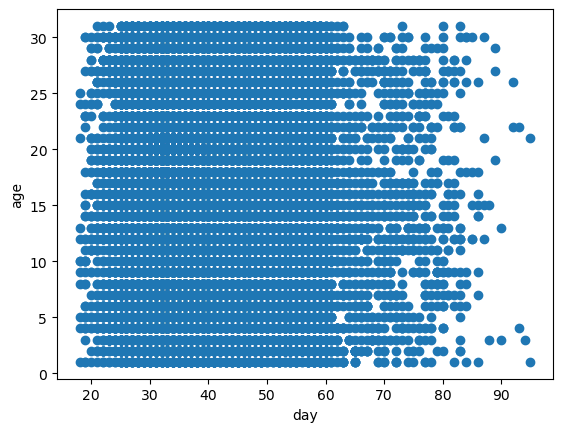

In [19]:
plt.scatter(customer['age'],customer['day'])
plt.ylabel("age")
plt.xlabel("day")

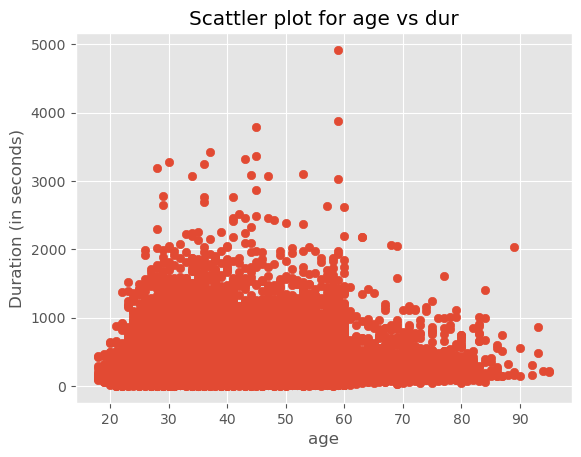

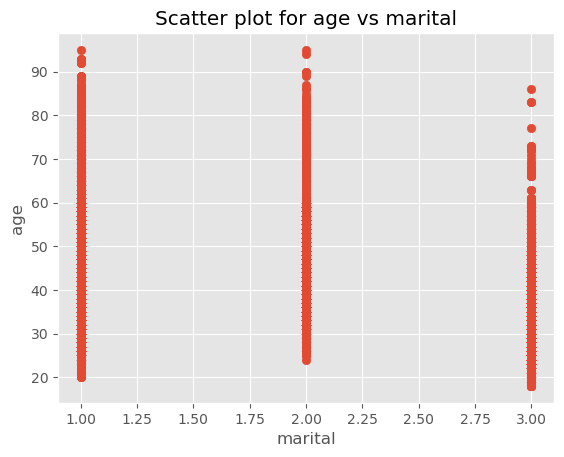

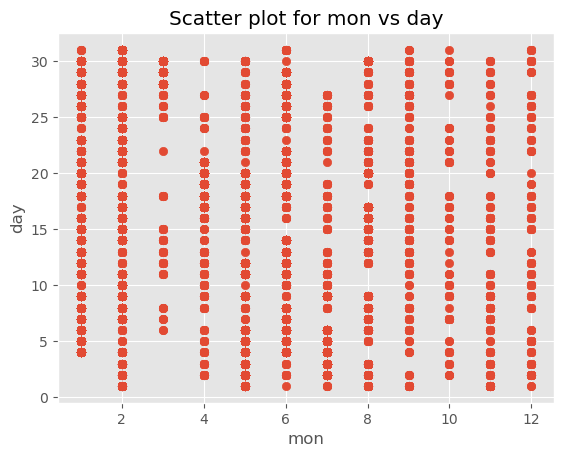

In [51]:
#Scatterplot
import matplotlib.pyplot as plt

plt.scatter(customer['age'], customer['dur'])
plt.xlabel('age')
plt.ylabel('Duration (in seconds)')
plt.title('Scattler plot for age vs dur')
plt.show()

plt.scatter(customer['marital'], customer['age'])
plt.ylabel('age')
plt.xlabel('marital')
plt.title('Scatter plot for age vs marital')
plt.show()

plt.scatter(customer['mon'], customer['day'])
plt.xlabel('mon')
plt.ylabel('day')
plt.title('Scatter plot for mon vs day')
plt.style.use('ggplot')
plt.show()

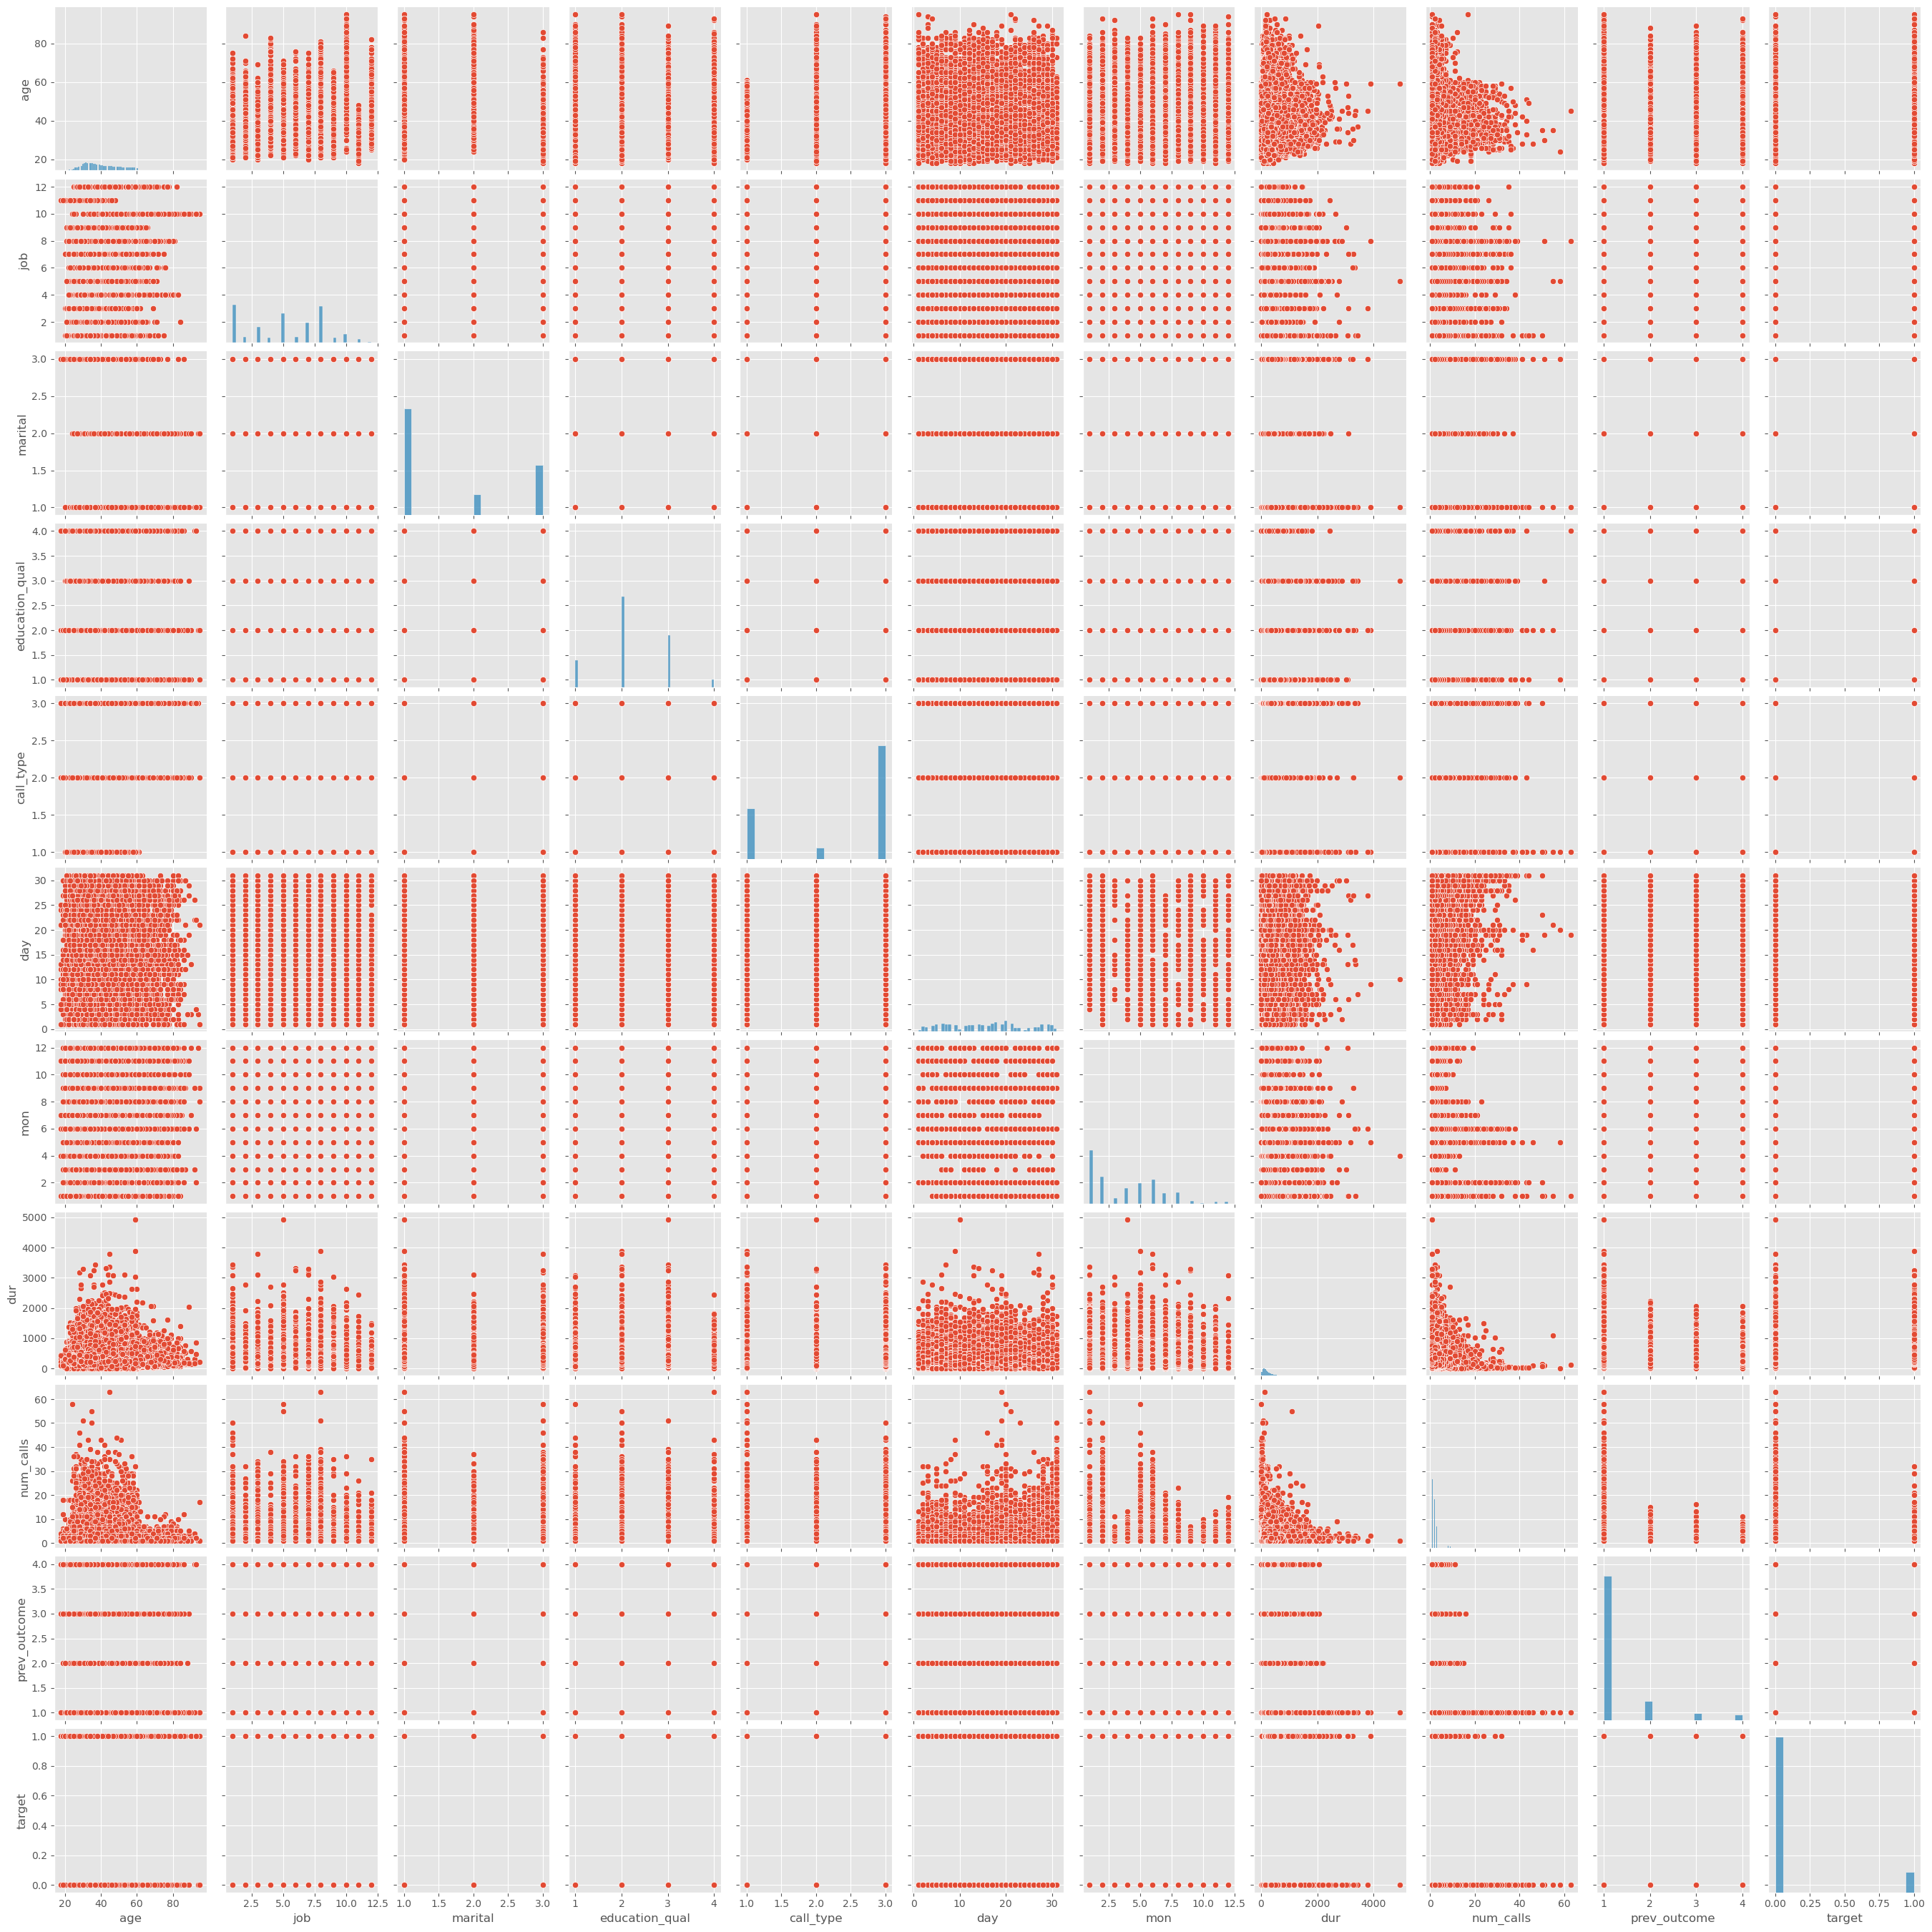

In [52]:
import seaborn as sns
sns.pairplot(customer)

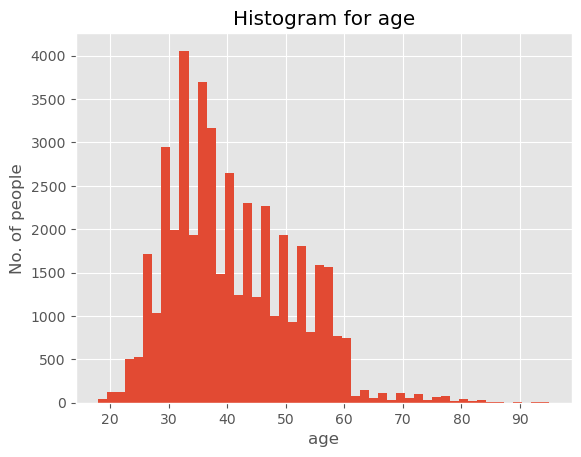

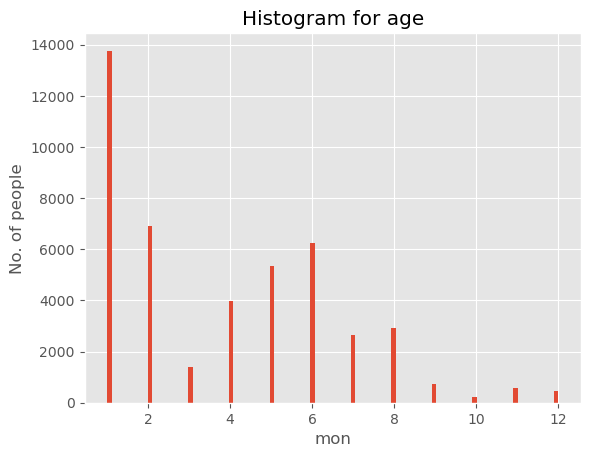

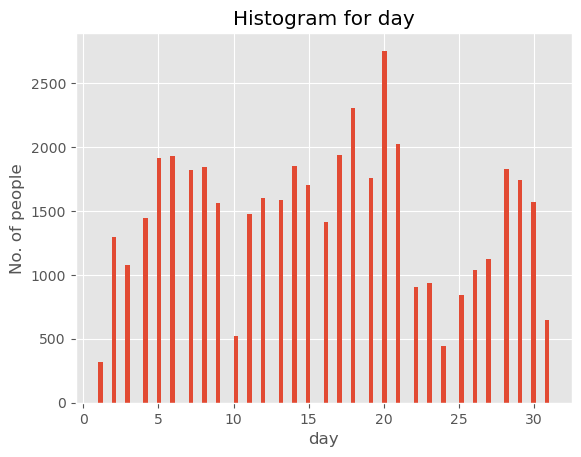

In [53]:
#Histogram
plt.hist(customer['age'], bins=50)
plt.xlabel('age')
plt.ylabel('No. of people')
plt.title('Histogram for age')
plt.show()


plt.hist(customer['mon'], bins=100)
plt.xlabel('mon')
plt.ylabel('No. of people')
plt.title('Histogram for age')
plt.show()

plt.hist(customer['day'], bins=100)
plt.xlabel('day')
plt.ylabel('No. of people')
plt.title('Histogram for day')
plt.show()

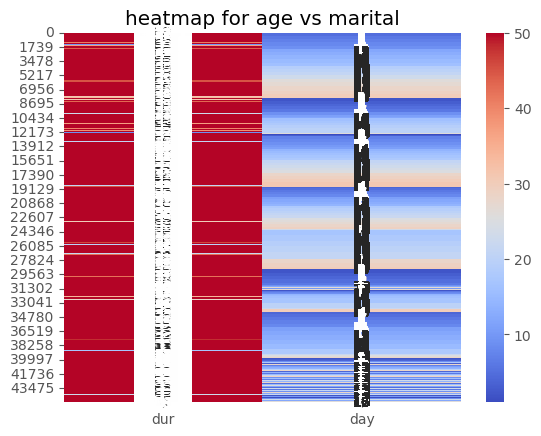

In [54]:
import seaborn as sns
sns.heatmap(customer[['dur','day']], annot=True, cmap='coolwarm', vmin=1, vmax=50)
plt.title('heatmap for age vs marital')
plt.show()

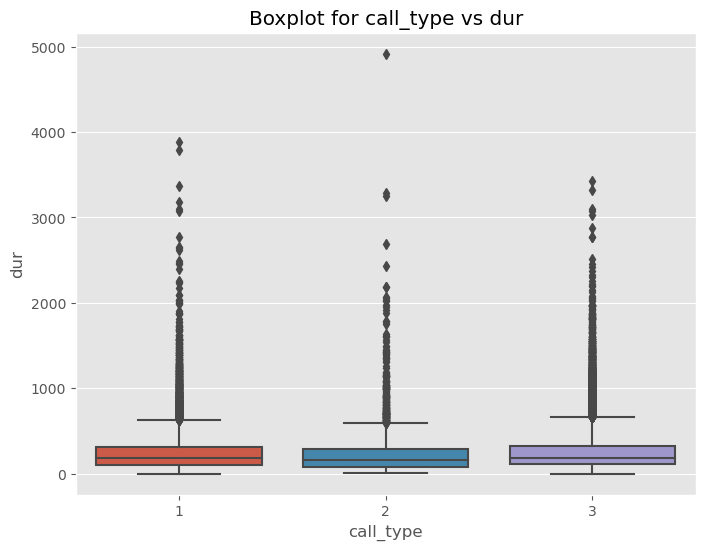

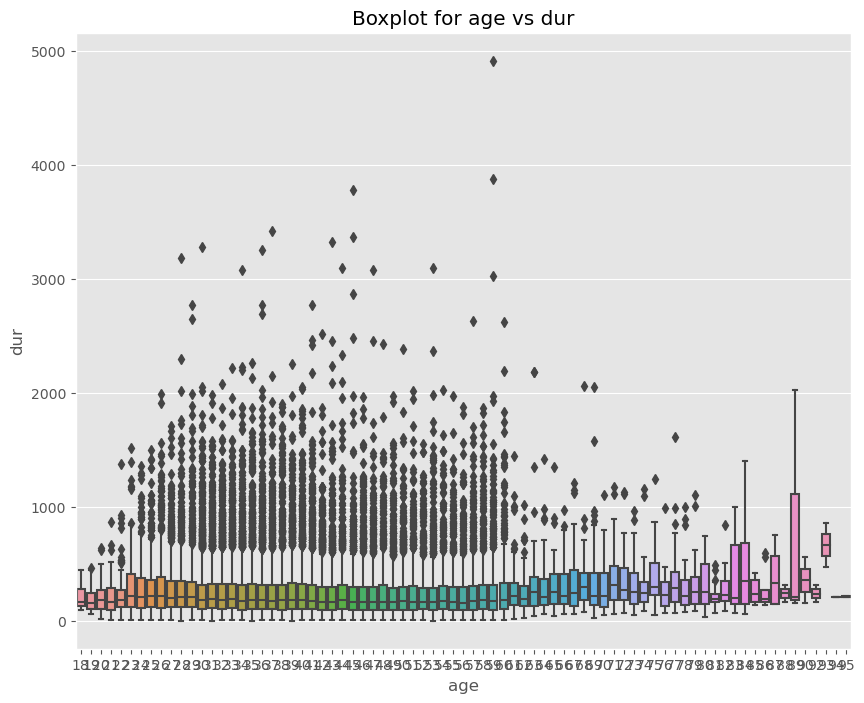

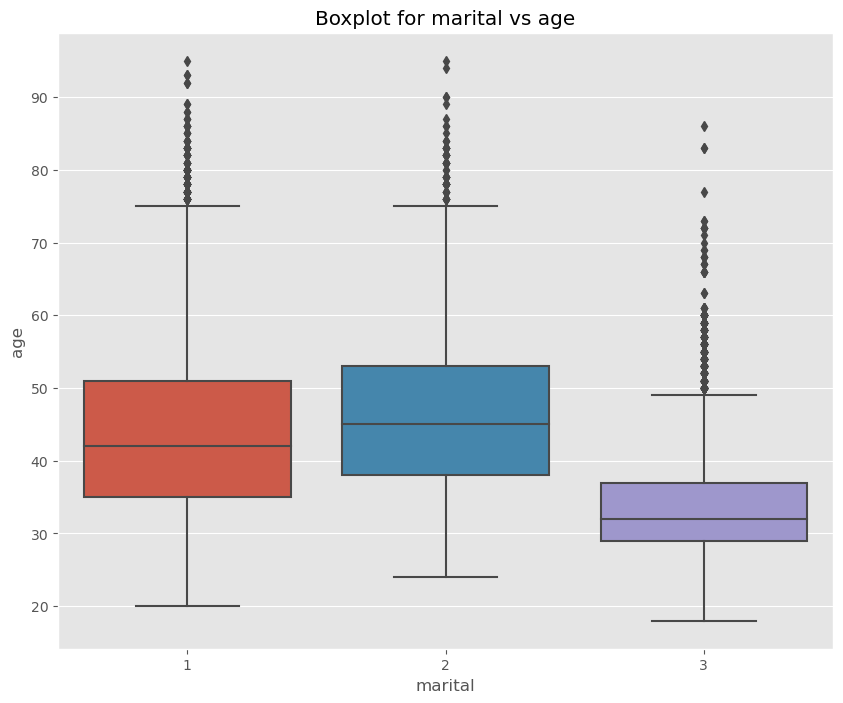

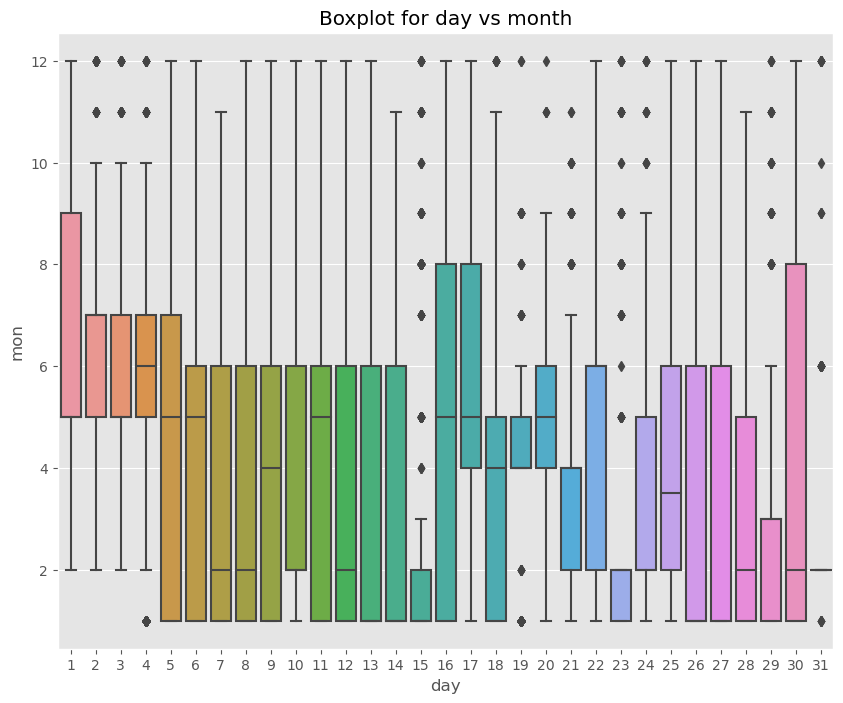

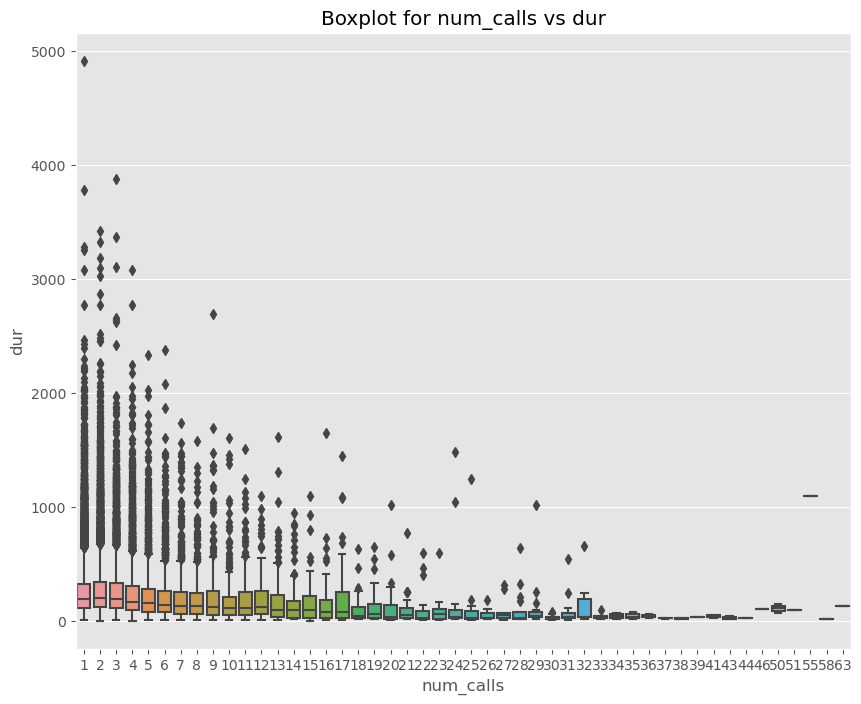

In [55]:
plt.figure(figsize=(8,6))
sns.boxplot(x='call_type', y='dur', data=customer)
plt.xlabel('call_type')
plt.ylabel('dur')
plt.title('Boxplot for call_type vs dur')
plt.show()

plt.figure(figsize=(10,8))
sns.boxplot(x='age', y='dur', data=customer)
plt.xlabel('age')
plt.ylabel('dur')
plt.title('Boxplot for age vs dur')
plt.show()

plt.figure(figsize=(10,8))
sns.boxplot(x='marital', y='age', data=customer)
plt.xlabel('marital')
plt.ylabel('age')
plt.title('Boxplot for marital vs age')
plt.show()

plt.figure(figsize=(10,8))
sns.boxplot(x='day', y='mon', data=customer)
plt.xlabel('day')
plt.ylabel('mon')
plt.title('Boxplot for day vs month')
plt.show()

plt.figure(figsize=(10,8))
sns.boxplot(x='num_calls', y='dur', data=customer)
plt.xlabel('num_calls')
plt.ylabel('dur')
plt.title('Boxplot for num_calls vs dur')
plt.show()

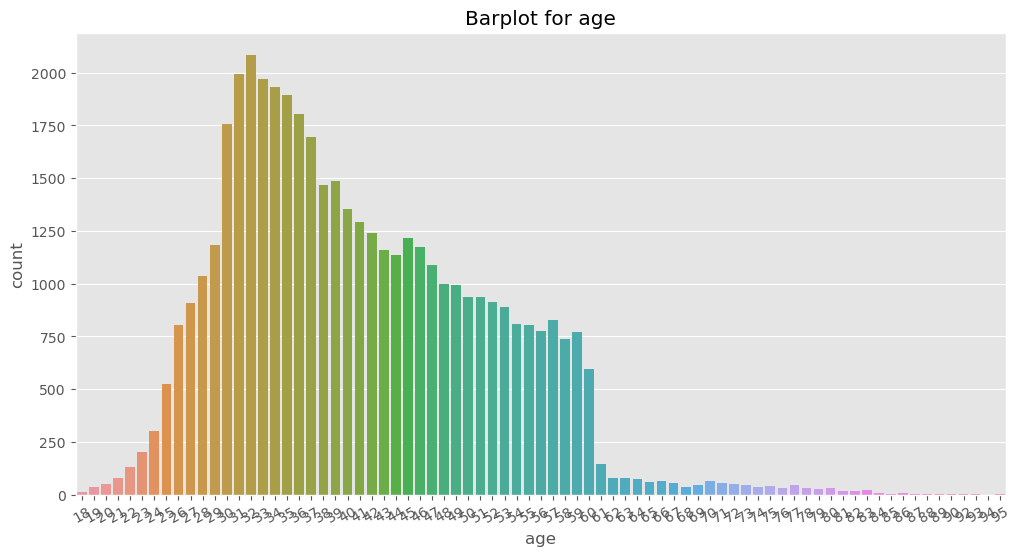

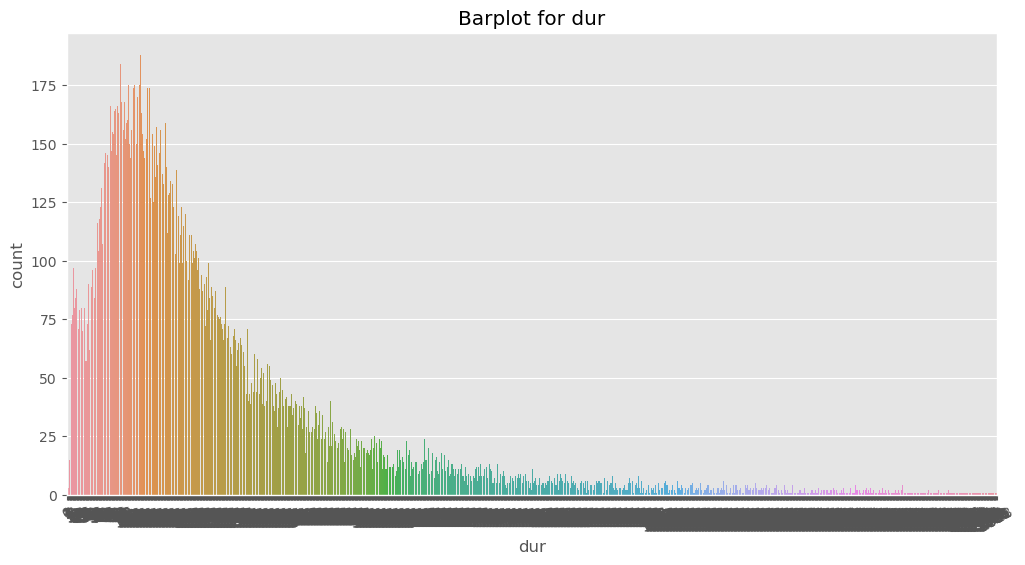

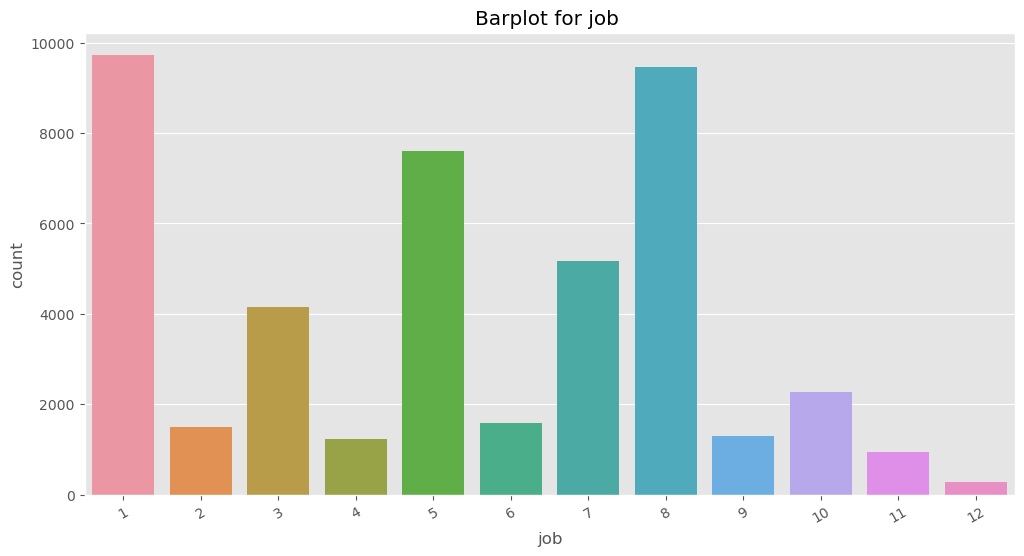

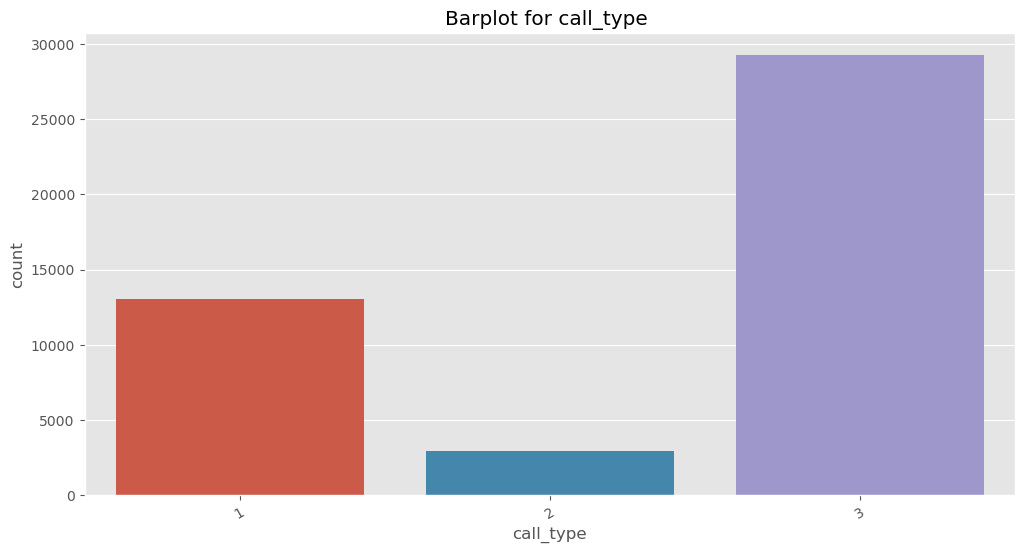

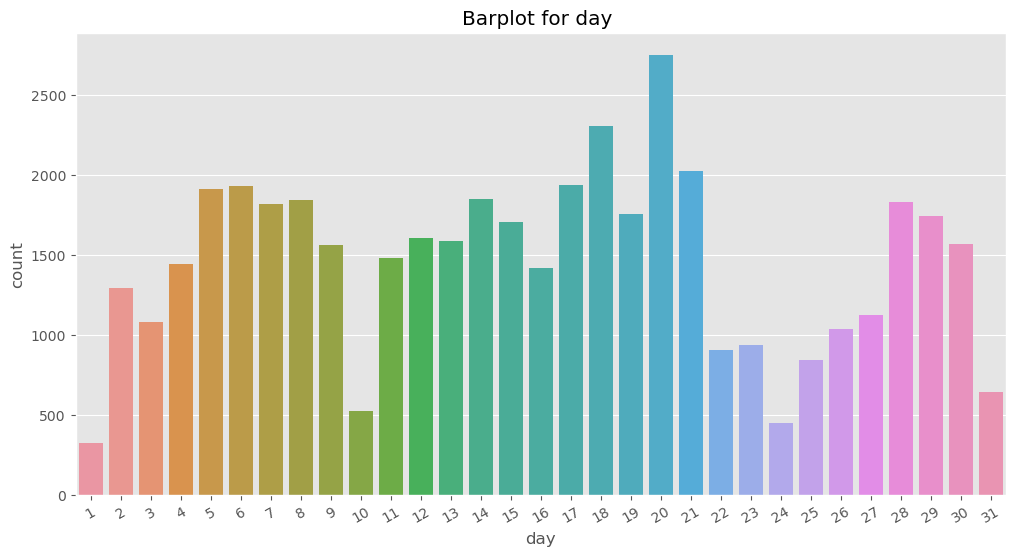

In [56]:
#barplot
plt.figure(figsize=(12,6))
sns.countplot(x='age', data=customer)
plt.xticks(rotation=30)
plt.xlabel('age')
plt.title('Barplot for age')
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(x='dur', data=customer)
plt.xticks(rotation=30)
plt.xlabel('dur')
plt.title('Barplot for dur')
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(x='job', data=customer)
plt.xticks(rotation=30)
plt.xlabel('job')
plt.title('Barplot for job ')
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(x='call_type', data=customer)
plt.xticks(rotation=30)
plt.xlabel('call_type')
plt.title('Barplot for call_type ')
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(x='day', data=customer)
plt.xticks(rotation=30)
plt.xlabel('day')
plt.title('Barplot for day ')
plt.show()



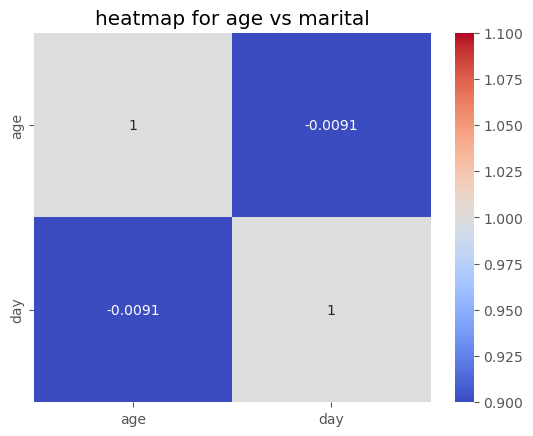

In [24]:
sns.heatmap(customer[['age','day']].corr(), annot=True, cmap='coolwarm', vmin=1, vmax=1)
plt.title('heatmap for age vs marital')
plt.show()

## Model Training

In [57]:
x = customer[['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon', 'dur', 'num_calls', 'prev_outcome']].values
y=customer['target'].values

In [58]:
##Splitting

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 3 )

## Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
IR = LogisticRegression()
IR.fit(x_train,y_train)
IR.score(x_test,y_test)

/Users/rajeshkannan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8879796527700984

## K-Nearest Neighbour(KNN)

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

for i in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50]:
    knn = KNeighborsClassifier(i)
    knn.fit(x_train, y_train)
    print("K value:", i, "Train Score:", knn.score(x_train, y_train), 
          "Cross Validation Accuracy:", np.mean(cross_val_score(knn, x_train, y_train, cv=5)))



/Users/rajeshkannan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/rajeshkannan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None wi

K value: 1 Train Score: 1.0 Cross Validation Accuracy: 0.8609545091402678


/Users/rajeshkannan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/rajeshkannan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None wi

K value: 2 Train Score: 0.9236894492368944 Cross Validation Accuracy: 0.8843453428077719


/Users/rajeshkannan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/rajeshkannan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None wi

K value: 3 Train Score: 0.9284450342844504 Cross Validation Accuracy: 0.8802807999048688


/Users/rajeshkannan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/rajeshkannan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None wi

K value: 4 Train Score: 0.9117175403671754 Cross Validation Accuracy: 0.8853682020870078


/Users/rajeshkannan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/rajeshkannan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None wi

K value: 5 Train Score: 0.9140123866401239 Cross Validation Accuracy: 0.8845664555990707


/Users/rajeshkannan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/rajeshkannan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None wi

K value: 6 Train Score: 0.9055518690555187 Cross Validation Accuracy: 0.8870824827120775


/Users/rajeshkannan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/rajeshkannan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None wi

K value: 7 Train Score: 0.9064089803140898 Cross Validation Accuracy: 0.8870271729796781


/Users/rajeshkannan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/rajeshkannan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None wi

K value: 8 Train Score: 0.9015704490157045 Cross Validation Accuracy: 0.8873589740384832


/Users/rajeshkannan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/rajeshkannan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None wi

K value: 9 Train Score: 0.9035058615350586 Cross Validation Accuracy: 0.8870548202011325


/Users/rajeshkannan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/rajeshkannan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None wi

K value: 10 Train Score: 0.8996626852466268 Cross Validation Accuracy: 0.8874695705690454


/Users/rajeshkannan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/rajeshkannan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None wi

K value: 20 Train Score: 0.8944923689449237 Cross Validation Accuracy: 0.8886860636025228


/Users/rajeshkannan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/rajeshkannan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None wi

K value: 30 Train Score: 0.8930269851802699 Cross Validation Accuracy: 0.888630795916223


/Users/rajeshkannan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/rajeshkannan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None wi

K value: 40 Train Score: 0.8913957089139571 Cross Validation Accuracy: 0.8889349382864555


/Users/rajeshkannan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/rajeshkannan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None wi

K value: 50 Train Score: 0.8911745189117452 Cross Validation Accuracy: 0.8890178914179362


/Users/rajeshkannan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [130]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score 
for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]: 
  knn= KNeighborsClassifier(i)
  knn.fit(x_train,y_train) 
  print("K value :", i, "Train Score : ", knn.score(x_train,y_train), "Cross Value Accuracy :" , np.mean(cross_val_score(knn, x)))

/Users/rajeshkannan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/rajeshkannan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
-------------------------------------------------------

K value : 1 Train Score :  1.0 Cross Value Accuracy : nan


/Users/rajeshkannan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/rajeshkannan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
-------------------------------------------------------

K value : 2 Train Score :  0.9236894492368944 Cross Value Accuracy : nan


/Users/rajeshkannan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/rajeshkannan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
-------------------------------------------------------

K value : 3 Train Score :  0.9284450342844504 Cross Value Accuracy : nan


/Users/rajeshkannan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/rajeshkannan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
-------------------------------------------------------

K value : 4 Train Score :  0.9117175403671754 Cross Value Accuracy : nan


/Users/rajeshkannan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/rajeshkannan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
-------------------------------------------------------

K value : 5 Train Score :  0.9140123866401239 Cross Value Accuracy : nan


/Users/rajeshkannan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/rajeshkannan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
-------------------------------------------------------

K value : 6 Train Score :  0.9055518690555187 Cross Value Accuracy : nan


/Users/rajeshkannan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/rajeshkannan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
-------------------------------------------------------

K value : 7 Train Score :  0.9064089803140898 Cross Value Accuracy : nan


/Users/rajeshkannan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/rajeshkannan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
-------------------------------------------------------

K value : 8 Train Score :  0.9015704490157045 Cross Value Accuracy : nan


/Users/rajeshkannan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/rajeshkannan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
-------------------------------------------------------

K value : 9 Train Score :  0.9035058615350586 Cross Value Accuracy : nan


/Users/rajeshkannan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/rajeshkannan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
-------------------------------------------------------

K value : 10 Train Score :  0.8996626852466268 Cross Value Accuracy : nan


/Users/rajeshkannan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/rajeshkannan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
-------------------------------------------------------

K value : 20 Train Score :  0.8944923689449237 Cross Value Accuracy : nan


/Users/rajeshkannan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/rajeshkannan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
-------------------------------------------------------

K value : 30 Train Score :  0.8930269851802699 Cross Value Accuracy : nan


/Users/rajeshkannan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/rajeshkannan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
-------------------------------------------------------

K value : 40 Train Score :  0.8913957089139571 Cross Value Accuracy : nan


/Users/rajeshkannan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K value : 50 Train Score :  0.8911745189117452 Cross Value Accuracy : nan


/Users/rajeshkannan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/rajeshkannan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 678, in _fit_and_score
    estimator.fit(X_train, **fit_params)
TypeError: fit() missing 1 required positional argument: 'y'

  warnings.warn(some_fits_failed_message, FitFailedWarning)


In [131]:
knn= KNeighborsClassifier(i)
knn.fit(x_train, y_train)
print("KNN Score: ",knn.score(x_test,y_test)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, knn.predict_proba(x_test)[:, 1]))
     

/Users/rajeshkannan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNN Score:  0.8832245936083158
AUROC on the sampled dataset :  0.864749720136904


## Decision Tree

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

In [64]:
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)
print("Decision Tree Score:" ,DT.score(x_train,y_train))
print("AUROC on the sampled dataset:",roc_auc_score(y_test,DT.predict_proba(x_test)[:,1]))


Decision Tree Score: 1.0
AUROC on the sampled dataset: 0.6923094837280174


In [68]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score #this will help me to do cross- validation
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  DT = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  DT.fit(x_train, y_train) # the model is trained
  trainAccuracy = accuracy_score(y_train, DT.predict(x_train)) # this is useless information - i am showing to prove a point
  DT = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(DT, x_test, y_test, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.8840964388409643  Cross val score :  0.878690778858847
Depth  :  2  Training Accuracy :  0.896040698960407  Cross val score :  0.8942826235760034
Depth  :  3  Training Accuracy :  0.9019022340190224  Cross val score :  0.8969371241382683
Depth  :  4  Training Accuracy :  0.9039205927892059  Cross val score :  0.8993685522906176
Depth  :  5  Training Accuracy :  0.9056624640566246  Cross val score :  0.8960518016916834
Depth  :  6  Training Accuracy :  0.9083720415837204  Cross val score :  0.8974893658631986
Depth  :  7  Training Accuracy :  0.9110539703605397  Cross val score :  0.894836209846966
Depth  :  8  Training Accuracy :  0.914924795399248  Cross val score :  0.8949464626216204
Depth  :  9  Training Accuracy :  0.9199568679495687  Cross val score :  0.8912977313841489
Depth  :  10  Training Accuracy :  0.9256248617562486  Cross val score :  0.8885333447416027
Depth  :  20  Training Accuracy :  0.9892722848927229  Cross val score :  0.8699551

In [69]:
DT = DecisionTreeClassifier(max_depth=5) 
DT.fit(x_train,y_train) 
print("Decision Tree Score : ", DT.score(x_train,y_train)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, DT.predict_proba(x_test)[:, 1]))

Decision Tree Score :  0.9056624640566246
AUROC on the sampled dataset :  0.8642942184265212
